In [1]:
# First, import PyTorch
import torch

In [2]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

# Tensor in PyTorch

In [3]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [4]:
# Now, make our labels from our data and true weights

y = activation(torch.sum(features * weights) + bias)
y = activation((features * weights).sum() + bias)

In [5]:
y

tensor([[0.1595]])

In [6]:
# using matrix multiplication
y = activation(torch.mm(features, weights.view(5,1)) + bias)

In [7]:
y

tensor([[0.1595]])

In [8]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [9]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.3171]])


# Neural Networks in PyTorch

In [10]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:
import helper

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


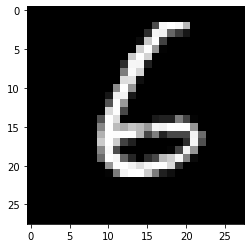

In [13]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [14]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

In [15]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building neural networks in PyTorch

In [19]:
from torch import nn
import torch.nn.functional as F

In [20]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [21]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
# weights and biases
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0175, -0.0130, -0.0109,  ..., -0.0229, -0.0169, -0.0241],
        [-0.0329,  0.0220, -0.0169,  ..., -0.0056, -0.0001, -0.0216],
        [ 0.0148, -0.0343,  0.0188,  ..., -0.0123, -0.0170,  0.0136],
        ...,
        [-0.0169, -0.0015, -0.0003,  ...,  0.0301, -0.0024, -0.0164],
        [ 0.0355, -0.0039,  0.0002,  ..., -0.0246,  0.0202,  0.0261],
        [ 0.0089, -0.0092, -0.0307,  ..., -0.0253,  0.0020,  0.0346]],
       requires_grad=True)
Parameter containing:
tensor([-0.0017, -0.0049, -0.0120, -0.0029,  0.0129, -0.0212, -0.0095, -0.0272,
         0.0167, -0.0153, -0.0331, -0.0252, -0.0264,  0.0132, -0.0282, -0.0336,
         0.0229, -0.0353,  0.0141,  0.0355, -0.0191, -0.0251, -0.0222,  0.0175,
        -0.0248, -0.0323,  0.0125,  0.0077,  0.0328, -0.0081, -0.0242, -0.0152,
         0.0103, -0.0129, -0.0142, -0.0087,  0.0133, -0.0122, -0.0205,  0.0128,
        -0.0118, -0.0239, -0.0298,  0.0182,  0.0261, -0.0310, -0.0199,  0.0118,
         0.0146

# Training Neural Networks

In [23]:
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3016, grad_fn=<NllLossBackward>)


## Backward

In [27]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [28]:
loss

tensor(2.3167, grad_fn=<NllLossBackward>)

In [29]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0058,  0.0058,  0.0058,  ...,  0.0058,  0.0058,  0.0058],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [ 0.0084,  0.0084,  0.0084,  ...,  0.0084,  0.0084,  0.0084]])


In [30]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [31]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0075, -0.0140,  0.0248,  ...,  0.0254, -0.0299,  0.0256],
        [-0.0188, -0.0249,  0.0065,  ..., -0.0284, -0.0170, -0.0102],
        [ 0.0033, -0.0089,  0.0341,  ..., -0.0239, -0.0265, -0.0099],
        ...,
        [-0.0284,  0.0292, -0.0146,  ..., -0.0259, -0.0287,  0.0313],
        [ 0.0277, -0.0311,  0.0033,  ..., -0.0342, -0.0209,  0.0072],
        [-0.0170,  0.0180, -0.0288,  ...,  0.0183,  0.0076, -0.0131]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034]])


In [32]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0075, -0.0140,  0.0248,  ...,  0.0254, -0.0299,  0.0256],
        [-0.0188, -0.0249,  0.0065,  ..., -0.0284, -0.0170, -0.0102],
        [ 0.0033, -0.0089,  0.0341,  ..., -0.0239, -0.0264, -0.0099],
        ...,
        [-0.0284,  0.0292, -0.0146,  ..., -0.0259, -0.0287,  0.0313],
        [ 0.0277, -0.0311,  0.0033,  ..., -0.0342, -0.0209,  0.0072],
        [-0.0171,  0.0179, -0.0289,  ...,  0.0183,  0.0076, -0.0131]],
       requires_grad=True)


In [33]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9706850933876119
Training loss: 0.8889987017871983
Training loss: 0.5251630273010177
Training loss: 0.43221675113701363
Training loss: 0.3885586821416548


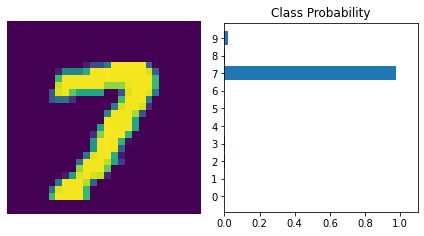

In [34]:
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)